第八节课内容

In [114]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import matplotlib.pyplot as plt  # 画图模块
import scipy.stats as stats # 统计模块
import scipy
from datetime import datetime # 时间模块
from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
import statsmodels.formula.api as smf  # OLS regression

#输出矢量图 渲染矢量图 是一个魔法函数（Magic Functions）内嵌绘图
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'

#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'
#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [115]:
data= pd.read_csv('C:\Users\ignorance\Desktop\Python\数据\000001.csv') 
data['Day']=pd.to_datetime(data['Day'],format = '%Y/%m/%d')
data.set_index('Day',inplace= True) 
data.sort_values(by=['Day'],axis=0,ascending=True)#axis=1??? True是升序

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.05,99.98,95.79,99.98,126000,4.940000e+05
1990-12-20,99.98,104.30,104.39,99.98,104.39,19700,8.400000e+04
1990-12-21,104.39,109.07,109.13,103.73,109.13,2800,1.600000e+04
1990-12-24,109.13,113.57,114.55,109.13,114.55,3200,3.100000e+04
1990-12-25,114.55,120.09,120.25,114.55,120.25,1500,6.000000e+03
...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11


In [116]:
daily_data = data['1995-01':'2022-07'].copy()
daily_data['Close'] = pd.to_numeric(daily_data['Close'])
daily_data['Preclose'] = pd.to_numeric(daily_data['Preclose'])
# 计算000001上证指数日收益率 两种：
daily_data['Raw_return'] = daily_data['Close'] / daily_data['Preclose'] - 1
daily_data['Log_return'] = np.log(daily_data['Close']) - np.log(daily_data['Preclose'])
daily_data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return,Log_return
Day,,,,,,,,,
1995-01-03,647.87,637.72,647.71,630.53,639.88,23451800,1.806930e+08,-0.012333,-0.012409
1995-01-04,639.88,641.90,655.51,638.86,653.81,42222000,3.069230e+08,0.021770,0.021536
1995-01-05,653.81,655.38,657.52,645.81,646.89,43012300,3.015330e+08,-0.010584,-0.010641
1995-01-06,646.89,642.75,643.89,636.33,640.76,48748200,3.537580e+08,-0.009476,-0.009521
1995-01-09,640.76,637.52,637.55,625.04,626.00,50985100,3.985190e+08,-0.023035,-0.023305
...,...,...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11,-0.005988,-0.006006
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11,0.008322,0.008288
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11,-0.000513,-0.000513


In [117]:
Month_data = daily_data.resample('m')['Log_return'].sum().to_frame()
Month_data['Raw_return'] = np.exp(Month_data['Log_return']) - 1
Month_data

,Log_return,Raw_return
Day,,
1995-01-31,-0.141139,-0.131631
1995-02-28,-0.023979,-0.023694
1995-03-31,0.163651,0.177803
1995-04-30,-0.109315,-0.103552
1995-05-31,0.188901,0.207922
...,...,...
2022-03-31,-0.062604,-0.060685
2022-04-30,-0.065154,-0.063077
2022-05-31,0.044724,0.045739


In [118]:
Quarter_data = daily_data.resample('Q')['Log_return'].sum().to_frame()
Quarter_data['Raw_return'] = np.exp(Quarter_data['Log_return']) - 1
Quarter_data

,Log_return,Raw_return
Day,,
1995-03-31,-0.001467,-0.001466
1995-06-30,-0.025583,-0.025258
1995-09-30,0.135980,0.145660
1995-12-31,-0.263130,-0.231358
1996-03-31,0.001979,0.001981
...,...,...
2021-09-30,-0.006434,-0.006413
2021-12-31,0.019870,0.020069
2022-03-31,-0.112592,-0.106484


In [119]:
Year_data = daily_data.resample('Y')['Log_return'].sum().to_frame()
Year_data['Raw_return'] = np.exp(Year_data['Log_return']) - 1
Year_data

,Log_return,Raw_return
Day,,
1995-12-31,-0.154200,-0.142899
1996-12-31,0.501639,0.651425
1997-12-31,0.264019,0.302153
1998-12-31,-0.040505,-0.039695
1999-12-31,0.175423,0.191750
2000-12-31,0.416917,0.517277
2001-12-31,-0.230898,-0.206180
2002-12-31,-0.192575,-0.175167
2003-12-31,0.097735,0.102670


In [120]:
inflation=pd.read_csv('D:\系统默认\桌面\python 课程\数据\inflation.csv' ) 
inflation['month']=pd.to_datetime(inflation['month'],format = '%Y/%m/%d')
inflation.set_index('month',inplace= True) 
inflation.sort_values(by=['month'],axis=0,ascending=True)#axis=1??? True是升序



,cpi
month,
1987-01-31,5.1000
1987-02-28,5.4000
1987-03-31,5.8000
1987-04-30,6.7000
1987-05-31,7.6000
...,...
2022-04-30,2.1304
2022-05-31,2.1000
2022-06-30,2.5000


In [121]:
inflation_data=inflation['1995-01':"2022-07"].copy()

通货膨胀和股票预期收益率

在经济处于高通货膨胀时期,人们无不希望能找到一种能有效抵御通货悖胀风险的资产以避免或降低财富缩水,而金融资产由于其流动性好,往往成为人们考虑的首选,这其中股票市场收益率与通货政胀率之间的关系尤为引人关注。事实上,早在20世纪30年代费雪就提出了著名的"费雪假说"费雪预言,预期通货膨胀与名义资产回报之间具有正相关关系,名义资产天生地是抵御通货膨胀的保值品。费雪假说提出后,经济理论界将该假说引中至股票市场,并由此得出了股票市场相关的费雪效应假说,即当通货膨胀率发生变化时,股票名义收益率也会相应地做出调整股票实际收益率保持不变,从而使得股票名义收益率应该与预期的通货通胀率之间存在一一对应的正向关系,因此,股票能够很好地对冲通货膨胀风险,是一种良好的通货膨胀保值品。

然而较高的通货膨胀往往意味着投资环境的恶化和和未来经济环境的悲观预期增加，也是经济衰退的重要先行指标，经济活动的萎缩带来上市公司盈利水平的下降，从而股票市场的回报率是下降的。

In [122]:
Month_data.reset_index(inplace=True)
Month_data

,Day,Log_return,Raw_return
0,1995-01-31,-0.141139,-0.131631
1,1995-02-28,-0.023979,-0.023694
2,1995-03-31,0.163651,0.177803
3,1995-04-30,-0.109315,-0.103552
4,1995-05-31,0.188901,0.207922
...,...,...,...
326,2022-03-31,-0.062604,-0.060685
327,2022-04-30,-0.065154,-0.063077
328,2022-05-31,0.044724,0.045739
329,2022-06-30,0.064468,0.066592


In [123]:
Month_data.rename(columns={'Day':'month'},inplace=True)
Month_data

,month,Log_return,Raw_return
0,1995-01-31,-0.141139,-0.131631
1,1995-02-28,-0.023979,-0.023694
2,1995-03-31,0.163651,0.177803
3,1995-04-30,-0.109315,-0.103552
4,1995-05-31,0.188901,0.207922
...,...,...,...
326,2022-03-31,-0.062604,-0.060685
327,2022-04-30,-0.065154,-0.063077
328,2022-05-31,0.044724,0.045739
329,2022-06-30,0.064468,0.066592


In [124]:
reg_data = pd.merge(Month_data,inflation_data,left_on='month',right_on='month')#合并默认只保留两边同时都有的
reg_data

,month,Log_return,Raw_return,cpi
0,1995-01-31,-0.141139,-0.131631,24.1000
1,1995-02-28,-0.023979,-0.023694,22.4000
2,1995-03-31,0.163651,0.177803,21.3000
3,1995-04-30,-0.109315,-0.103552,20.7000
4,1995-05-31,0.188901,0.207922,20.3000
...,...,...,...,...
326,2022-03-31,-0.062604,-0.060685,1.5000
327,2022-04-30,-0.065154,-0.063077,2.1304
328,2022-05-31,0.044724,0.045739,2.1000
329,2022-06-30,0.064468,0.066592,2.5000


In [125]:
reg_data.set_index('month',inplace=True)
reg_data

,Log_return,Raw_return,cpi
month,,,
1995-01-31,-0.141139,-0.131631,24.1000
1995-02-28,-0.023979,-0.023694,22.4000
1995-03-31,0.163651,0.177803,21.3000
1995-04-30,-0.109315,-0.103552,20.7000
1995-05-31,0.188901,0.207922,20.3000
...,...,...,...
2022-03-31,-0.062604,-0.060685,1.5000
2022-04-30,-0.065154,-0.063077,2.1304
2022-05-31,0.044724,0.045739,2.1000


In [126]:
reg_data2 = pd.merge(Month_data,inflation,on = 'month')#两边变量名一样
reg_data2

,month,Log_return,Raw_return,cpi
0,1995-01-31,-0.141139,-0.131631,24.1000
1,1995-02-28,-0.023979,-0.023694,22.4000
2,1995-03-31,0.163651,0.177803,21.3000
3,1995-04-30,-0.109315,-0.103552,20.7000
4,1995-05-31,0.188901,0.207922,20.3000
...,...,...,...,...
326,2022-03-31,-0.062604,-0.060685,1.5000
327,2022-04-30,-0.065154,-0.063077,2.1304
328,2022-05-31,0.044724,0.045739,2.1000
329,2022-06-30,0.064468,0.066592,2.5000


In [157]:
reg_data3 = pd.merge(Month_data,inflation,how='right',on = 'month')#往右合并，以inflation为主，所以左边会有缺失值
reg_data3

,month,Log_return,Raw_return,cpi
0,1987-01-31,NaN,NaN,5.1000
1,1987-02-28,NaN,NaN,5.4000
2,1987-03-31,NaN,NaN,5.8000
3,1987-04-30,NaN,NaN,6.7000
4,1987-05-31,NaN,NaN,7.6000
...,...,...,...,...
423,2022-04-30,-0.065154,-0.063077,2.1304
424,2022-05-31,0.044724,0.045739,2.1000
425,2022-06-30,0.064468,0.066592,2.5000
426,2022-07-31,-0.043718,-0.042776,2.7000


画图

CPU times: total: 62.5 ms
Wall time: 69.8 ms


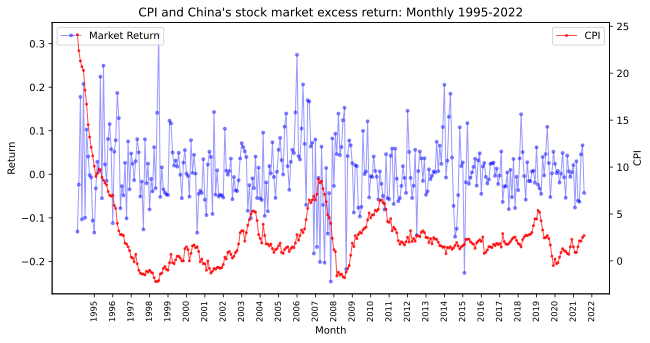

In [158]:
%%time
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['Raw_return'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Return')
ax1.set_xlabel('Month')  # 设置横坐标标签
ax1.set_ylabel('Return')  # 设置左边纵坐标标签
ax1.legend(loc=2)  # 设置2图例在左上方   1是右上方
ax1.set_title("CPI and China's stock market excess return: Monthly 1995-2022")  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(reg_data['cpi'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='CPI')
ax2.set_ylabel('CPI')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2023', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

#fig = plt.gcf()
#fig.savefig('cpi.pdf', bbox_inches='tight')

描述性统计

In [159]:
reg_data['cpi'].describe().round(5)


count    331.00000
mean       2.72495
std        3.73223
min       -2.20000
25%        0.90000
50%        1.90000
75%        3.21280
max       24.10000
Name: cpi, dtype: float64

In [160]:
reg_data['cpi'].skew()
reg_data['cpi'].kurt()

2.7439302649220605

10.552827174776652

OLS回归结果

In [161]:
reg_data['lcpi'] = reg_data['cpi'].shift(2)
model_cpi = smf.ols('Raw_return ~ lcpi',
                 data=reg_data['2000-01':'2022-07']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     10.70
Date:                Sat, 05 Nov 2022   Prob (F-statistic):            0.00121
Time:                        14:31:08   Log-Likelihood:                 333.71
No. Observations:                 271   AIC:                            -663.4
Df Residuals:                     269   BIC:                            -656.2
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0231      0.008      3.067      0.0

预测收益率

CPU times: total: 62.5 ms
Wall time: 34.9 ms


Text(0, 0.5, 'Return')

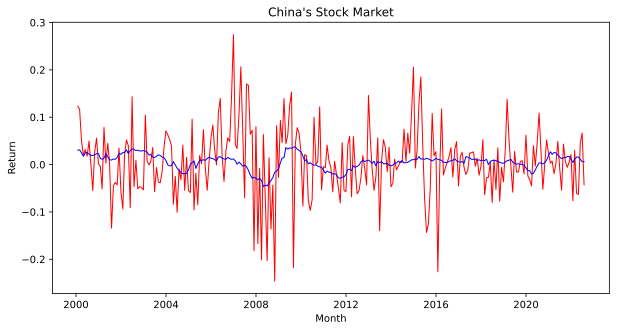

In [162]:
%%time
data = reg_data['2000-01':'2022-07'].copy()
data['fitted_return'] =  model_cpi.fittedvalues

fig = plt.figure(figsize=(10, 5))
plt.plot('Raw_return',
         '-r',
         label='ret',
         linewidth=1,
         data=data)
plt.plot('fitted_return',
         '-b',
         label='Fitted Return',
         linewidth=1,
         data=data)
plt.title("China's Stock Market")
plt.xlabel('Month')  # 画图的x轴名称
plt.ylabel('Return')  # 画图的y轴名称

#fig = plt.gcf()
#fig.savefig('fitted_return.pdf', bbox_inches='tight')  # 更改输出图片格式 jpg

季度结果

In [163]:
Q_reg_data = reg_data['1995-01':'2021-06'].resample('Q').apply({
    'Raw_return':
    lambda x: np.exp(np.log(1 + x).sum()) - 1,
    'cpi':
    np.sum
})
Q_reg_data

,Raw_return,cpi
month,,
1995-03-31,-0.001466,67.8000
1995-06-30,-0.025258,59.2000
1995-09-30,0.145660,44.4000
1995-12-31,-0.231358,33.4000
1996-03-31,0.001981,28.1000
...,...,...
2020-06-30,0.085216,8.2131
2020-09-30,0.078193,6.7715
2020-12-31,0.079247,0.2000


CPU times: total: 62.5 ms
Wall time: 60.8 ms


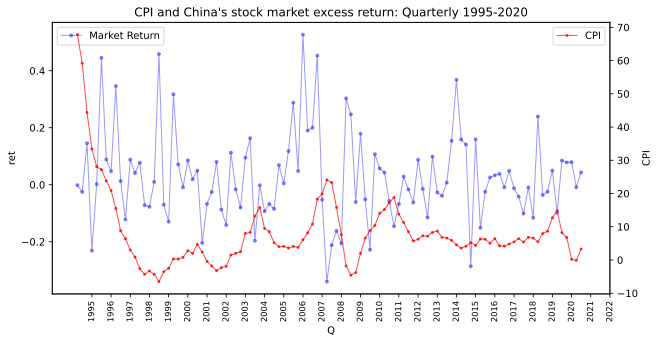

In [164]:
%%time
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(Q_reg_data['Raw_return'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Return')
ax1.set_xlabel('Q')  # 设置横坐标标签
ax1.set_ylabel('ret')  # 设置左边纵坐标标签
ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("CPI and China's stock market excess return: Quarterly 1995-2020")  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(Q_reg_data['cpi'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='CPI')
ax2.set_ylabel('CPI')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2023', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

#fig = plt.gcf()
#fig.savefig('Qcpi.pdf', bbox_inches='tight')

In [165]:
Q_reg_data['lcpi'] = Q_reg_data['cpi'].shift(1)
model_qcpi = smf.ols('Raw_return ~ lcpi',
                 data=Q_reg_data['2000-01':'2022-06']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_qcpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     7.984
Date:                Sat, 05 Nov 2022   Prob (F-statistic):            0.00589
Time:                        14:31:09   Log-Likelihood:                 45.018
No. Observations:                  86   AIC:                            -86.04
Df Residuals:                      84   BIC:                            -81.13
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0739      0.032      2.314      0.0

CPU times: total: 141 ms
Wall time: 24 ms


Text(0, 0.5, 'Return')

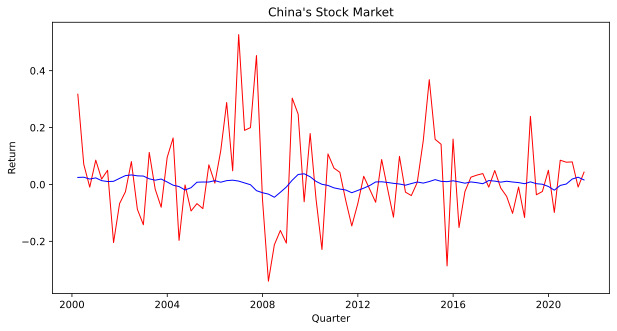

In [166]:
%%time
data = Q_reg_data['2000-01':'2022-06'].copy()
data['fitted_return'] =  model_cpi.fittedvalues

fig = plt.figure(figsize=(10, 5))
plt.plot('Raw_return',
         '-r',
         label='ret',
         linewidth=1,
         data=data)
plt.plot('fitted_return',
         '-b',
         label='Fitted Return',
         linewidth=1,
         data=data)
plt.title("China's Stock Market")
plt.xlabel('Quarter')  # 画图的x轴名称
plt.ylabel('Return')  # 画图的y轴名称

#fig = plt.gcf()
#fig.savefig('Qfitted_return.pdf', bbox_inches='tight') 

长期预测

In [167]:
reg_data['next_ret'] = reg_data['Raw_return'].shift(-1) + 1
reg_data['next_ret2'] = reg_data['Raw_return'].shift(-2) + 1
reg_data['next_ret3'] = reg_data['Raw_return'].shift(-3) + 1
reg_data['future_3month_return'] = reg_data['next_ret'] * reg_data['next_ret2'] * reg_data['next_ret3'] - 1
reg_data

,Log_return,Raw_return,cpi,lcpi,next_ret,next_ret2,next_ret3,future_3month_return
month,,,,,,,,
1995-01-31,-0.141139,-0.131631,24.1000,NaN,0.976306,1.177803,0.896448,0.030822
1995-02-28,-0.023979,-0.023694,22.4000,NaN,1.177803,0.896448,1.207922,0.275370
1995-03-31,0.163651,0.177803,21.3000,24.1000,0.896448,1.207922,0.900173,-0.025258
1995-04-30,-0.109315,-0.103552,20.7000,22.4000,1.207922,0.900173,1.103032,0.199369
1995-05-31,0.188901,0.207922,20.3000,21.3000,0.900173,1.103032,1.040716,0.033347
...,...,...,...,...,...,...,...,...
2022-03-31,-0.062604,-0.060685,1.5000,0.9000,0.936923,1.045739,1.066592,0.045022
2022-04-30,-0.065154,-0.063077,2.1304,0.9000,1.045739,1.066592,0.957224,0.067665
2022-05-31,0.044724,0.045739,2.1000,1.5000,1.066592,0.957224,NaN,NaN


In [168]:
model_cpi_3month = smf.ols('future_3month_return ~ lcpi',
                 data=reg_data['2000-01':'2022-06']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi_3month.summary())

                             OLS Regression Results                             
Dep. Variable:     future_3month_return   R-squared:                       0.074
Model:                              OLS   Adj. R-squared:                  0.071
Method:                   Least Squares   F-statistic:                     7.810
Date:                  Sat, 05 Nov 2022   Prob (F-statistic):            0.00557
Time:                          14:31:09   Log-Likelihood:                 150.19
No. Observations:                   268   AIC:                            -296.4
Df Residuals:                       266   BIC:                            -289.2
Df Model:                             1                                         
Covariance Type:                    HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0601      0.022

整理结果

In [169]:
from statsmodels.iolib.summary2 import summary_col

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[model_cpi, model_cpi_3month, model_qcpi],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['Month CPI', 'Month future 3 CPI', 'Quarter CPI'],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Stock Market Return')

print(results_table)

  Table - OLS Regressions: Forecast Stock Market Return
                 Month CPI Month future 3 CPI Quarter CPI
---------------------------------------------------------
Intercept        0.023***  0.060***           0.074**    
                 (0.008)   (0.022)            (0.032)    
lcpi             -0.008*** -0.020***          -0.008***  
                 (0.002)   (0.007)            (0.003)    
R-squared        0.047     0.074              0.094      
R-squared Adj.   0.043     0.071              0.084      
No. observations 271       268                86         
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
